In [1]:
%matplotlib notebook

In [2]:
import nltk

# Homework

If you'd like some, check out the exercises at the end of the first chapter of the NLTK Book: <http://www.nltk.org/book/ch01.html>.

# Review

In [3]:
# lists -- mutable collections indexed by a sequence of integers starting at 0
lst = [1, 2, 3]
# id() gives us the memory location of an object, which is like its ID card
id(lst)

4528023496

In [4]:
lst.append(4)

In [5]:
# the list has grown...
lst

[1, 2, 3, 4]

In [6]:
# ... but it's still "the same" object, just its content was modified 
id(lst)

4528023496

In [7]:
# changing an element of a list is the same story
lst[2] = 42
lst

[1, 2, 42, 4]

In [8]:
id(lst)

4528023496

In [9]:
# by the way, in Jupyter, In and Out (see left margin of cells) are globally
# available lists which allow you to refer to any previous input or output
# of a cell evaluation action
In[2]

'import nltk'

In [10]:
# tuples are kind of like lists, but immutable -- they can't be modified in place
pair = (1, 2)

In [12]:
pair[0] = 42

TypeError: 'tuple' object does not support item assignment

In [13]:
# both lists and tuples support "destructuring assignment"
first, second = pair
first

1

In [14]:
second

2

In [15]:
# strings are also kind of like lists, but also immutable and optimized for
# storing text data
name = name2 = "Monty"
name[0]

'M'

In [16]:
id(name)

4528068680

In [17]:
# when you want to "modify" a string, you need to create a new one based on
# the old one. even string methods like .upper() return a new string (unlike
# e.g. .append() with lists). you can give it the same name (i.e. take the
# label away from the old string and give it to the new one), but it'll still
# be a different string with a brand new ID card
name = name.upper()
name

'MONTY'

In [18]:
name2

'Monty'

In [19]:
id(name)

4528067728

In [20]:
# dictionaries are collections of key--value pairs; like lists, they're mutable;
# unlike lists, which are indexed (keyed) by a sequence of integers, dictionaries
# can be keyed by any immutable piece of data (typically strings, but tuples would
# work as well)
freq = {"the": 42, "python": 1}
freq

{'python': 1, 'the': 42}

In [21]:
freq = dict(the=42, python=1)
freq

{'python': 1, 'the': 42}

In [22]:
freq = dict([("the", 42), ("python", 1)])
freq

{'python': 1, 'the': 42}

In [23]:
freq["python"]

1

In [24]:
# "for expressions" can be used to iterate over the elements of a collection while
# acting on their values (filtering them, computing new values based on them);
# they're lazy, i.e. they're not evaluated until someone asks for their output
(-num for num in lst)

<generator object <genexpr> at 0x10de3b7d8>

In [25]:
# the values they generate can either be retrieved one by one with next()...
gen = (-num for num in lst)
next(gen)

-1

In [26]:
next(gen)

-2

In [27]:
# ... or by passing them as input to a function which exhausts a collection as
# part of its operation (because it needs to get to the end of the collection
# to compute a result)
list(-num for num in lst)

[-1, -2, -42, -4]

In [28]:
# equivalently (this syntax is called a "list comphrehension"):
[-num for num in lst]

[-1, -2, -42, -4]

In [29]:
sorted(-num for num in lst)

[-42, -4, -2, -1]

In [30]:
# some functions like reversed() or range() also create generators
list(reversed(lst))

[4, 42, 2, 1]

In [31]:
list(range(3))

[0, 1, 2]

In [32]:
# NOTE: unlike above with the list comprehension, this does not work, it just
# creates a list which *contains* the generator object instead of exhausting it
[range(3)]

[range(0, 3)]

In [33]:
# you need an explicit "for" when using the list comprehension syntax to make
# it clear to python that you want to exhaust the generator, so the following
# works (but it's more verbose than just list(range(3)) for no good reason)
[num for num in range(3)]

[0, 1, 2]

# How is text represented inside a computer?

See <http://dlukes.github.io/unicode.html> if you're interested in a more detailed account.

A **character set** is a huge table mapping a sequence of integers (whole numbers) to characters. Each row of this table is called a **codepoint**.

- [ASCII](http://www.ascii-code.com/) is an old, English-centric character set which can represent 128 characters
- [Unicode](http://www.babelstone.co.uk/Unicode/unicode.html) is the current global standard for a universal character set which currently defines ~128k characters (in theory, it allows for 17 "planes" of ~65k characters each → ~1M in total)

In [34]:
# chr() takes an integer and gives you the corresponding character in the
# *Unicode* character set table
chr(45697)

'늁'

In [35]:
# ord() does the reverse operation
ord("늁")

45697

An **encoding** is a mapping between the sequence of integers in a character set and actual physical bits (0's and 1's) in the computer's memory. One character set can be encoded in various ways. A **fixed-width encoding** spends the same amount of bits per codepoint. OK for small character sets, but very wasteful for huge character sets!

In [36]:
# Unicode in theory has ~1M codepoints; to represent the "biggest" ones,
# you'd need ~20 bits, which means that you'd need ~20 bits for all of
# them
2**20

1048576

**UTF-8** is a **variable-width encoding** for Unicode which uses some tricks to represent more frequently used characters with less bits. Please use it for your textual data, it's ubiquitous, smart and sexy!

Python mostly assumes UTF-8 bytes as input, then converts those bytes to its own internal representation of Unicode (= the strings we've been using all along), then encodes to UTF-8 bytes for output (though this can all be customized, generally by passing an `encoding=...` parameter to the relevant functions).

In [37]:
# you can also play with encoding and decoding manually and break stuff, yay!
č_utf8_bytes = "č".encode("utf-8")

In [38]:
č_utf8_bytes

b'\xc4\x8d'

In [39]:
# decoding text that was intended to be UTF-8 with a different encoding results
# in jumbled characters
č_utf8_bytes.decode("cp1250")

'ÄŤ'

In [40]:
from unicodedata import normalize

In [41]:
for codepoint in "č":
    print(codepoint)

č


In [42]:
for codepoint in normalize("NFD", "č"):
    print(codepoint)

c
̌


In [43]:
print(normalize("NFD", "č"))

č


In [44]:
from nltk.corpus import gutenberg as gut

In [45]:
gut.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [46]:
words = gut.words()

In [47]:
words[:10]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

In [48]:
gut.sents()[132:134]

[['Some',
  'people',
  'even',
  'talked',
  'of',
  'a',
  'promise',
  'to',
  'his',
  'wife',
  'on',
  'her',
  'deathbed',
  ',',
  'and',
  'others',
  'of',
  'the',
  'son',
  'and',
  'the',
  'uncle',
  'not',
  'letting',
  'him',
  '.'],
 ['All',
  'manner',
  'of',
  'solemn',
  'nonsense',
  'was',
  'talked',
  'on',
  'the',
  'subject',
  ',',
  'but',
  'I',
  'believed',
  'none',
  'of',
  'it',
  '.']]

In [49]:
emma = nltk.Text(gut.words('austen-emma.txt'))

In [50]:
emma.concordance("surprise")

Displaying 1 of 1 matches:
 that Emma could not but feel some surprise , and a little displeasure , on he


<IPython.core.display.Javascript object>


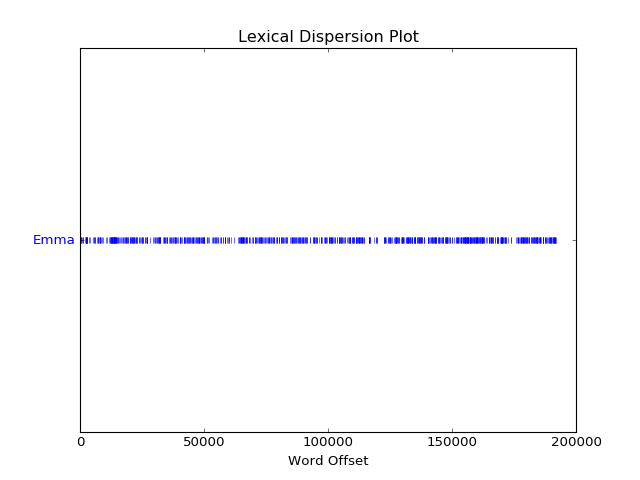

In [51]:
emma.dispersion_plot(["Emma"])

In [52]:
from nltk.corpus import brown

In [53]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [54]:
brown.words(categories="news")

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [55]:
brown.words(categories=["news", "editorial", "reviews"])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [56]:
news = brown.words(categories="news")
fdist = nltk.FreqDist(w.lower() for w in news)
modals = ["can", "could", "may", "might", "must", "will"]
for m in modals:
    print(m + ":", fdist[m], "/", fdist.freq(m)*1e6)

can: 94 / 934.8210911550012
could: 87 / 865.2067545796289
may: 93 / 924.8761859299482
might: 38 / 377.9063985520218
must: 53 / 527.0799769278199
will: 389 / 3868.5681325456967


In [57]:
# conditional frequency distributions
cfd = nltk.ConditionalFreqDist(
          (genre, word)
          for genre in brown.categories()
          for word in brown.words(categories=genre))
# select a subset of cfd.conditions()
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
# the parameters limit the cfd only to the genres and words of interest to us
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 
